#   HEART DISEASE PREDICTION MODEL.


In [1]:
#Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


In [2]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score 

### IMPORTING DATASET 

In [3]:
heart = pd.read_csv("dataset.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Describing the dataset 

In [4]:
heart.info()
print("==" *40)
len(heart)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


303

In [5]:
heart.describe()
# print(heart["chol"].max())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Now we have to preprocess the data 


### And the first step is to change the missing values into their means

In [6]:
# we have unknown values '?'
# change unrecognized value '?' into mean value through the column
for c in heart.columns[:]:
    heart[c] = heart[c].apply(lambda x: heart[heart[c]!='?'][c].astype(float).mean() if x == "?" else x)
    heart[c] = heart[c].astype(float)

In [7]:
heart.target.value_counts()

1.0    165
0.0    138
Name: target, dtype: int64

In [8]:
heart[-10:]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67.0,1.0,2.0,152.0,212.0,0.0,0.0,150.0,0.0,0.8,1.0,0.0,3.0,0.0
294,44.0,1.0,0.0,120.0,169.0,0.0,1.0,144.0,1.0,2.8,0.0,0.0,1.0,0.0
295,63.0,1.0,0.0,140.0,187.0,0.0,0.0,144.0,1.0,4.0,2.0,2.0,3.0,0.0
296,63.0,0.0,0.0,124.0,197.0,0.0,1.0,136.0,1.0,0.0,1.0,0.0,2.0,0.0
297,59.0,1.0,0.0,164.0,176.0,1.0,0.0,90.0,0.0,1.0,1.0,2.0,1.0,0.0
298,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
299,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0
302,57.0,0.0,1.0,130.0,236.0,0.0,0.0,174.0,0.0,0.0,1.0,1.0,2.0,0.0


##  Next step is on understanding the data.
###  We use Correalation Matrix here understand the degree of association between the features.

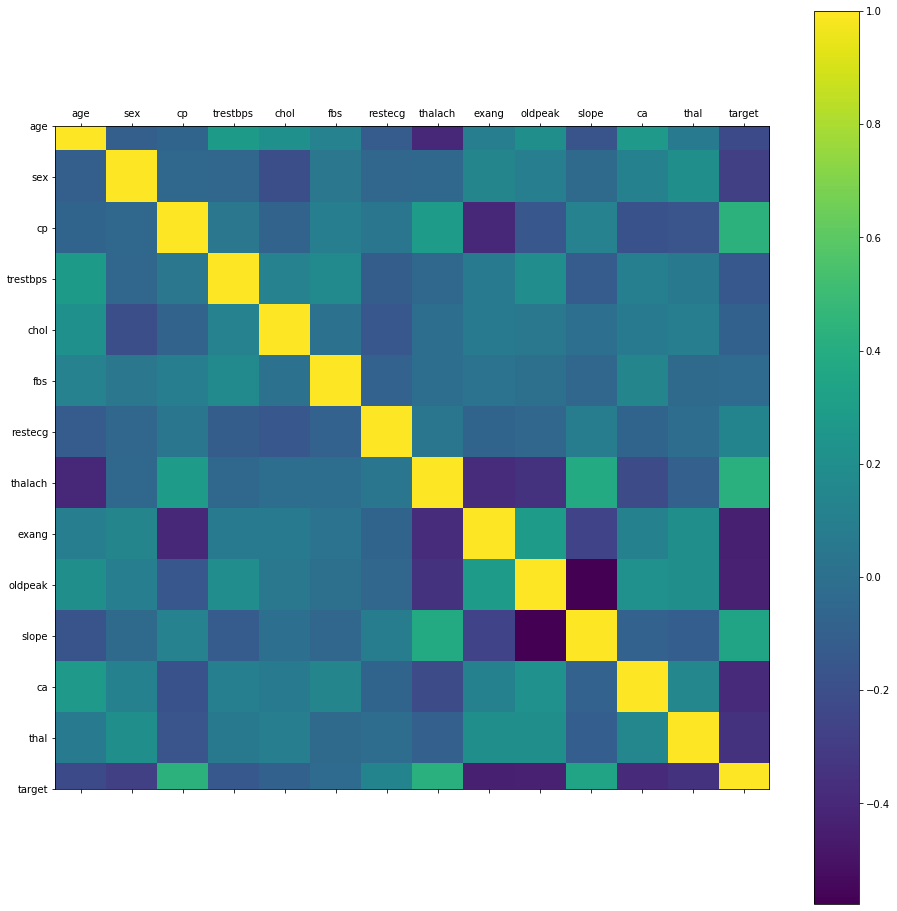

In [9]:
rcParams['figure.figsize'] = 20, 20
plt.matshow(heart.corr())
plt.yticks(np.arange(heart.shape[1]), heart.columns)
plt.xticks(np.arange(heart.shape[1]), heart.columns)
plt.colorbar()

## We find no feature that has a significant correalation with the target value
###  Some features even have negative correlation with the target value, but few features have lower positive correlation

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B5778F7B08>,
      dtype=object)

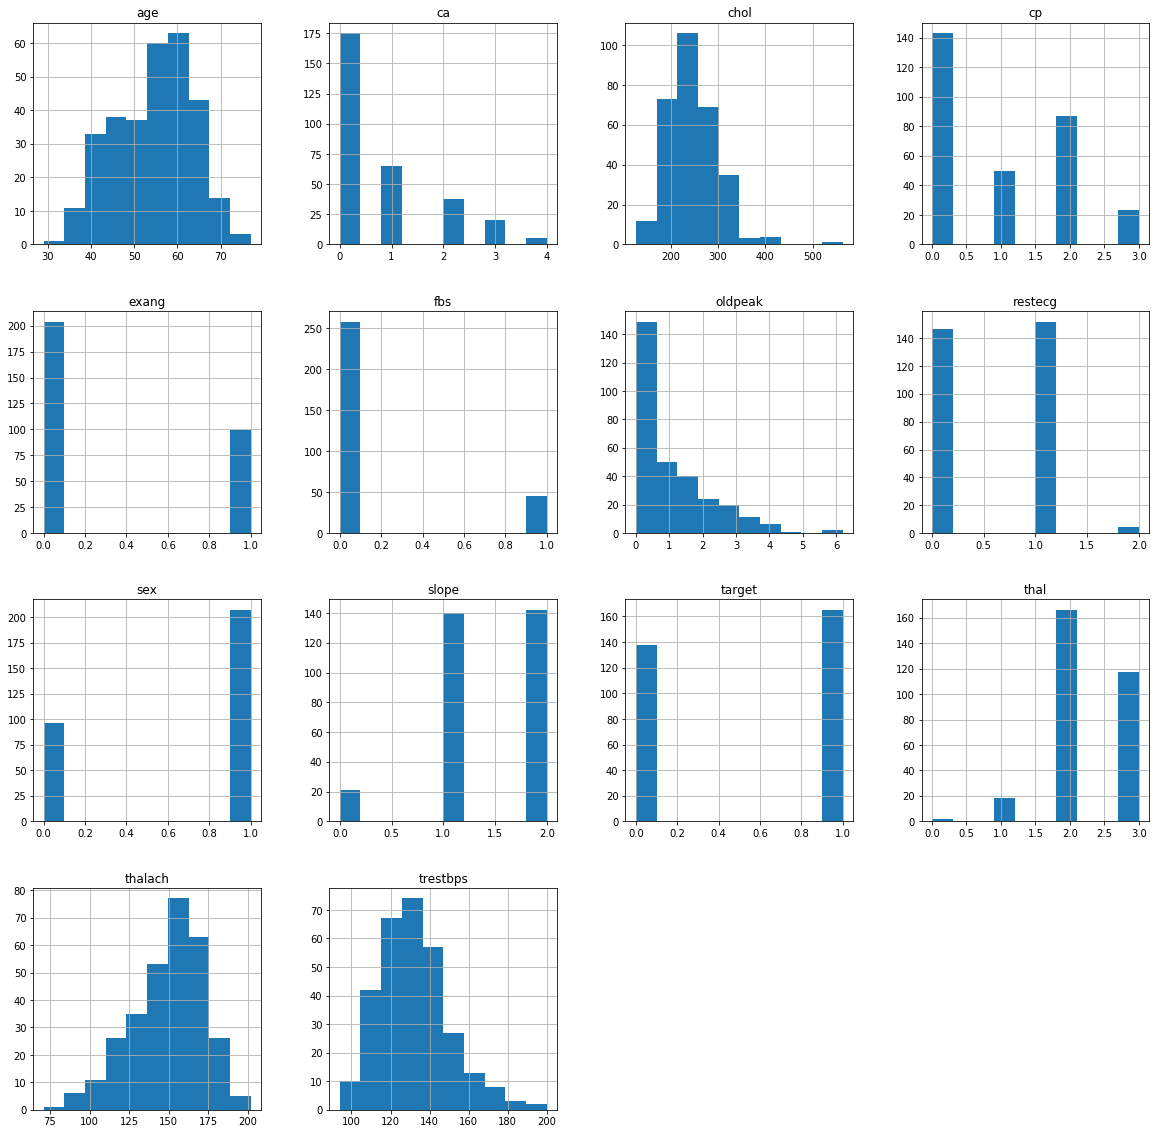

In [10]:
heart.hist()

Text(0.5, 1.0, 'Count of each target')

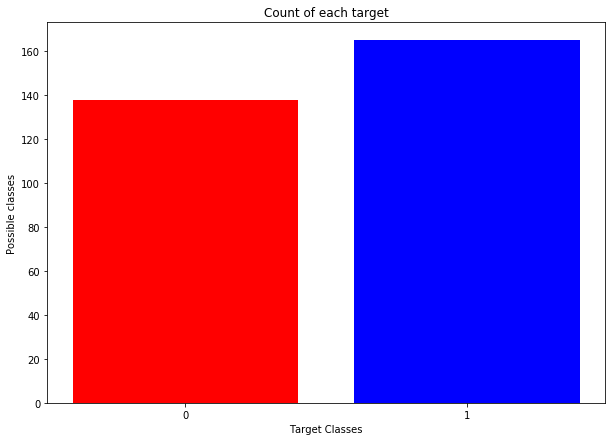

In [11]:
        rcParams['figure.figsize'] = 10, 7
        plt.bar(heart['target'].unique(), heart['target'].value_counts(), color = ['blue', 'red'])
        plt.xticks([0,1])
        plt.xlabel('Target Classes')
        plt.ylabel('Possible classes')
        plt.title('Count of each target')

In [7]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Feature scaling.............................................
some features may have a greater influence over others in the outcome since distances are used

In [12]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range
columns_to_scale = ['age','cp', 'trestbps', 'chol', 'thalach', 'oldpeak']
for col in columns_to_scale:
    lowerbound,upperbound = outlier_treatment(heart[col])  
    heart.drop(heart[ (heart[col] > upperbound) | (heart[col] < lowerbound) ].index , inplace=True)

In [13]:
# heart = pd.get_dummies(heart, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
min_max = MinMaxScaler()
columns_to_scale = ['age','cp', 'trestbps', 'chol', 'thalach', 'oldpeak','thal','ca','slope']
heart[columns_to_scale ] = min_max.fit_transform(heart[columns_to_scale ])

In [25]:
heart.shape

(284, 14)

## Thus we have normalized the dataset accordingly but placing the values in range for proper evaluation using the MinMaxScaler/ StandardScaler ????

In [13]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.322332,0.354941,0.274575,0.148515,0.528053,0.600358,0.326733,0.167678,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,0.344017,0.165454,0.118335,0.356198,0.525860,0.174849,0.469794,0.187270,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,0.333333,0.339623,0.260274,0.000000,1.000000,0.625954,0.000000,0.129032,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,0.666667,0.433962,0.339041,0.000000,1.000000,0.725191,1.000000,0.258065,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [14]:
from sklearn.linear_model import Lasso

# THE DATA SET IS NOW READY..


# WE CAN BEGIN WITH OUR TRAINING MODELS






In [15]:
y = heart['target']
X = heart.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print(len(X_train))
len(X_test)


213


71

In [16]:
lasso=Lasso()
lasso = Lasso(alpha=0.01, max_iter=10e5)
lasso.fit(X_train,y_train)
coef_dict = {}
for coef, feat in zip(lasso.coef_,X_train):
    coef_dict[feat] = coef
coeff_used00001 = np.sum(lasso.coef_!=0)

In [17]:
coef_dict

{'age': -0.0,
 'sex': -0.19973138942523366,
 'cp': 0.2678074655988135,
 'trestbps': -0.0,
 'chol': -0.0,
 'fbs': -0.0,
 'restecg': 0.028909572471217244,
 'thalach': 0.0,
 'exang': -0.2016491380437256,
 'oldpeak': -0.31345950953438256,
 'slope': 0.12297024165416119,
 'ca': -0.4141596080891296,
 'thal': -0.09888311043791062}

In [18]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
267,0.416667,1.0,0.666667,0.315789,0.098291,0.0,0.0,0.333333,0.0,0.200,1.0,0.75,0.666667
102,0.708333,0.0,0.333333,0.605263,0.294872,0.0,1.0,0.798246,0.0,0.000,1.0,0.50,0.666667
230,0.375000,1.0,0.666667,0.184211,0.500000,0.0,1.0,0.561404,0.0,0.000,1.0,0.00,0.666667
167,0.687500,0.0,0.000000,0.605263,0.606838,0.0,0.0,0.631579,0.0,0.900,0.0,0.50,0.666667
117,0.562500,1.0,1.000000,0.342105,0.286325,0.0,0.0,0.649123,0.0,0.475,0.5,0.00,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,0.520833,1.0,0.000000,0.368421,0.683761,0.0,0.0,0.245614,1.0,0.800,0.5,0.50,0.666667
198,0.687500,1.0,0.000000,0.342105,0.602564,0.0,1.0,0.096491,1.0,0.450,0.5,0.50,1.000000
123,0.520833,0.0,0.666667,0.184211,0.602564,0.0,0.0,0.692982,0.0,0.000,1.0,0.00,0.666667
49,0.500000,0.0,0.000000,0.578947,0.461538,0.0,0.0,0.631579,0.0,0.000,1.0,0.00,0.666667


In [19]:
X_train_final=X_train.loc[:,['sex', 'cp','restecg', 'exang', 'oldpeak',
       'slope', 'ca', 'thal']]
X_test_final=X_test.loc[:,['sex', 'cp','restecg', 'exang', 'oldpeak',
       'slope', 'ca', 'thal']]


##  dataset  is spit into 75% training data and 25% testing data.

        Decision Tree Classifier


This classifier creates a decision tree based on which, it assigns the class values to each data point. Here, we can vary the maximum number of features to be considered while creating the model. I range features from 1 to 30 (the total features in the dataset after dummy columns were added).

In [26]:
dt_scores = []
for i in range(1, len(X_train_final.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train_final, y_train)
    dt_scores.append(dt_classifier.score(X_test_final, y_test))

In [41]:
dt_scores

[0.8169014084507042,
 0.7464788732394366,
 0.8450704225352113,
 0.8591549295774648,
 0.8591549295774648,
 0.8450704225352113,
 0.8450704225352113,
 0.8028169014084507]

### Training and Testing phase Completed.
### Next Plotting


KeyError: 1

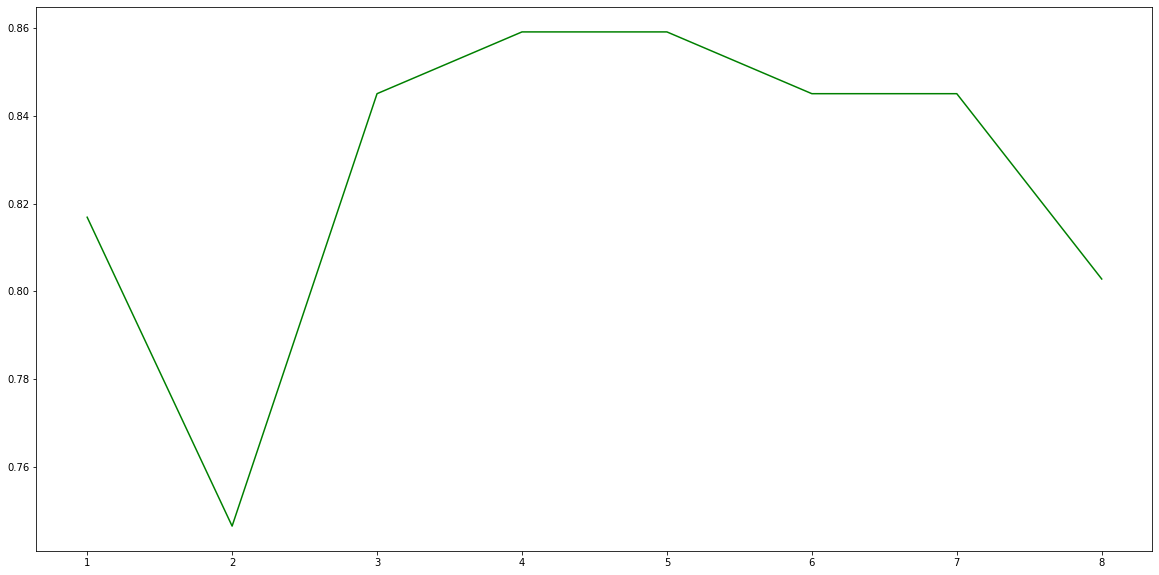

In [27]:
rcParams['figure.figsize'] = 20, 10
plt.plot([i for i in range(1, len(X_train_final.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X_train_final.columns) + 1):
    plt.text(X_train_final[i], dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X_train_final.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [23]:
dt_scores = []
for i in range(1, len(X_train.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

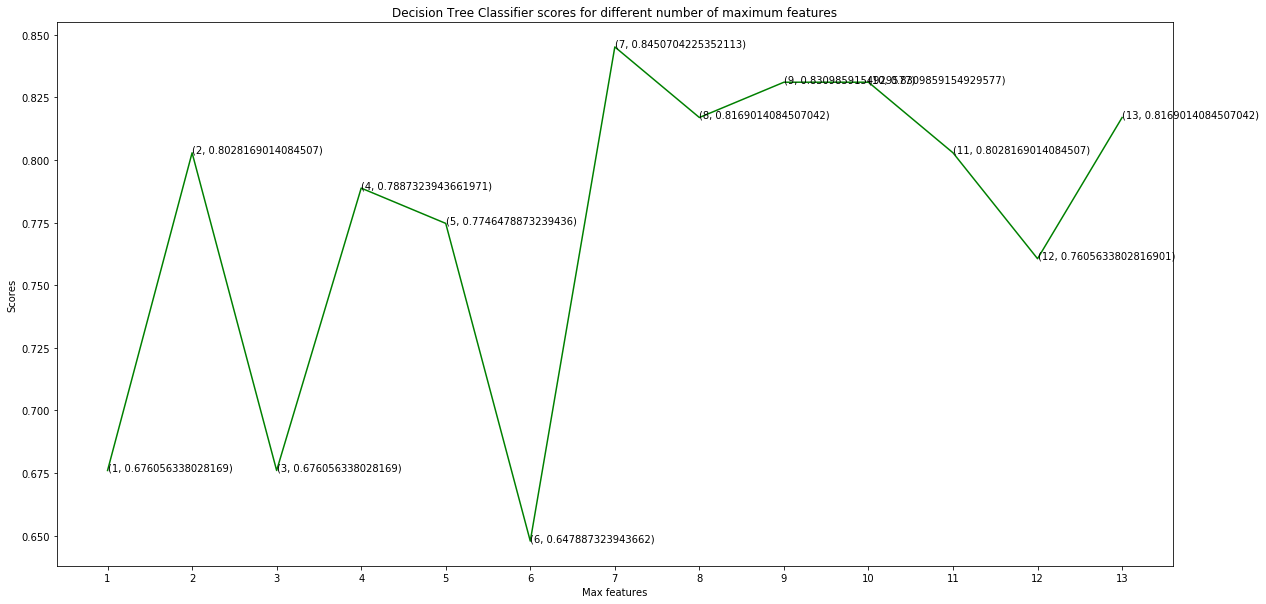

In [24]:
rcParams['figure.figsize'] = 20, 10
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [47]:
gnb_scores = []
#l=len(X.columns)
for i in range(1, len(X_train_final.columns) + 1):
    gaussian=GaussianNB()
    gaussian.fit(X_train_final.iloc[:,0:i],y_train)
    bayes_pred=gaussian.predict(X_test.iloc[:,0:i])
    #bayes_cm=confusion_matrix(y_test,bayes_pred)
    gnb_scores.append(accuracy_score(bayes_pred,y_test))

In [20]:
X_train.shape

(227, 13)

In [21]:
y_train.shape

(227,)

Text(0.5, 1.0, 'Naive Bayes Classifier scores for different number of maximum features')

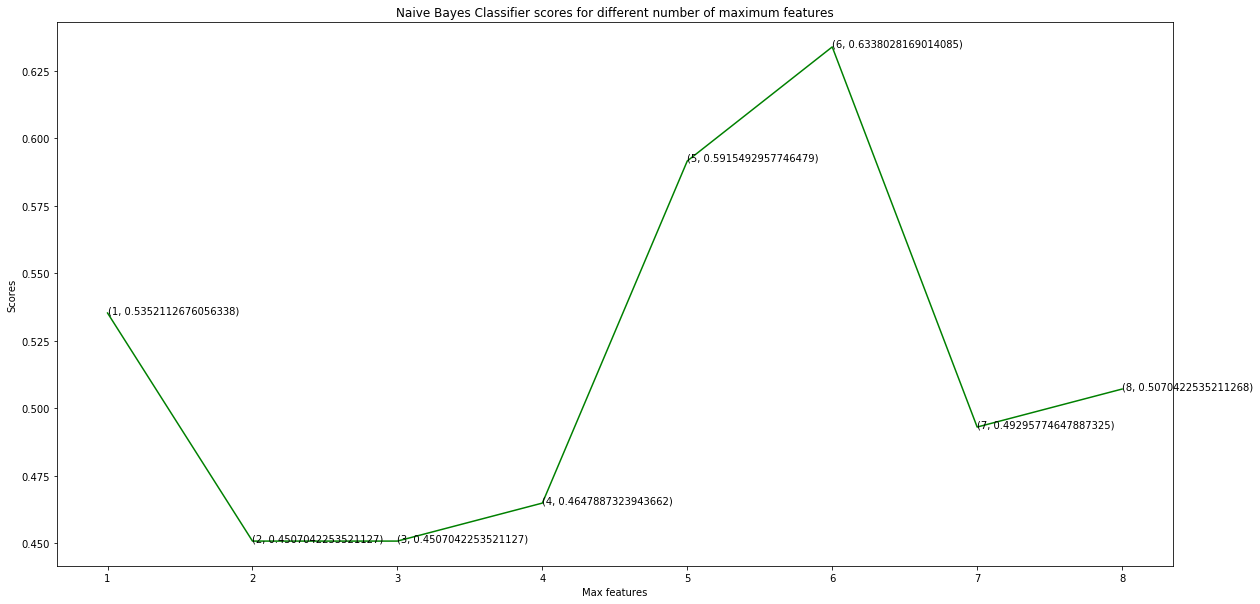

In [51]:
rcParams['figure.figsize'] = 20, 10
plt.plot([i for i in range(1, len(X_train_final.columns) + 1)], gnb_scores, color = 'green')
for i in range(1, len(X_train_final.columns) + 1):
    plt.text(i, gnb_scores[i-1], (i, gnb_scores[i-1]))
plt.xticks([i for i in range(1, len(X_train_final.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Naive Bayes Classifier scores for different number of maximum features')

[0.7236842105263158, 0.5657894736842105, 0.6710526315789473, 0.6710526315789473, 0.6710526315789473, 0.631578947368421, 0.6447368421052632, 0.7236842105263158, 0.7368421052631579, 0.7763157894736842, 0.8026315789473685, 0.7763157894736842, 0.8289473684210527]
